##### Importing Libraries

In [23]:
import pandas as pd
import warnings
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")

##### Reading the .csv files

In [24]:
print("Reading dataset")
#Reading the train and test data from the file and storing it in an object
trainDataAug = pd.read_csv('/Users/hhundiwala/Documents/SPL/SPL Project/uber-raw-data-aug14.csv', sep=',',header=0,keep_default_na=False)
trainDataSep = pd.read_csv('/Users/hhundiwala/Documents/SPL/SPL Project/uber-raw-data-sep14.csv', sep=',',header=0,keep_default_na=False)
trainDataLyft = pd.read_csv('/Users/hhundiwala/Documents/SPL/SPL Project/other-Lyft.csv', sep=',',header=0,keep_default_na=False)
print("Dataset Read Successfully")

Reading dataset
Dataset Read Successfully


###### Clean the Data.      (Remove na-values, normalise the data)

In [25]:
#Cleaning the data
trainDataAug = trainDataAug.dropna()
trainDataSep = trainDataSep.dropna()
trainDataLyft = trainDataLyft.dropna()

##### Let's peek into our dataset

In [26]:
print(trainDataAug.head(5))

       Date/Time      Lat      Lon Taxi Service
0  8/1/2014 0:03  40.7366 -73.9906         Uber
1  8/1/2014 0:09  40.7260 -73.9918         Uber
2  8/1/2014 0:12  40.7209 -74.0507         Uber
3  8/1/2014 0:12  40.7387 -73.9856         Uber
4  8/1/2014 0:12  40.7323 -74.0077         Uber


In [27]:
print(trainDataSep.head(5))

       Date/Time      Lat      Lon Taxi Service
0  9/1/2014 0:01  40.2201 -74.0021         Uber
1  9/1/2014 0:01  40.7500 -74.0027         Uber
2  9/1/2014 0:03  40.7559 -73.9864         Uber
3  9/1/2014 0:06  40.7450 -73.9889         Uber
4  9/1/2014 0:11  40.8145 -73.9444         Uber


In [28]:
print(trainDataLyft.head(5))

         Date/Time       Lat       Lon Taxi Service
0    9/4/2014 9:51  40.64705 -73.77988         Lyft
1  8/27/2014 21:13  40.74916 -73.98373         Lyft
2   9/4/2014 14:16  40.64065 -73.97594         Lyft
3   9/4/2014 16:08  40.75002 -73.99514         Lyft
4   8/28/2014 2:41  40.76715 -73.98636         Lyft


In [29]:
#merging the datasets of August, September, Lyft
trainData = trainDataAug.append(trainDataLyft).append(trainDataSep)
trainData["taxi_code"] = trainData['Taxi Service'].map({'Uber':1,'Lyft':2})
#Cleaning the data by removing the NA values
trainData = trainData.dropna()


trainData['Date/Time'] = pd.to_datetime(trainData['Date/Time'], infer_datetime_format =True)
#print(trainData['Date/Time'][1])
trainData['hour'] = trainData['Date/Time'].dt.hour
plttrainData = trainData

X = trainData[["Lat","Lon","hour"]]
y = trainData[["taxi_code"]]

#### Cleaned Data

In [30]:
X.head(10)

,Lat,Lon,hour
0,40.7366,-73.9906,0
1,40.7260,-73.9918,0
2,40.7209,-74.0507,0
3,40.7387,-73.9856,0
4,40.7323,-74.0077,0
5,40.7349,-74.0033,0
6,40.7279,-73.9542,0
7,40.7210,-73.9937,0
8,40.7195,-74.0060,0
9,40.7448,-73.9799,0


#### Size of Data

In [31]:
X.shape

(2125111, 3)

###### Aproximately 21 lakh rows

#### Creating Machine Learning Algorithms

In [32]:
_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

from sklearn.cluster import KMeans

for k in [2]:
    uberCluster = KMeans(n_clusters=k, init='k-means++', n_init=20, max_iter=1000)
    print(uberCluster)
    model=uberCluster.fit(X_train, y_train)
    predictions = model.predict(X_test)
    #pred_cluster_centers = [uberCluster.cluster_centers_[i] for i in predictions]
    centroids = uberCluster.cluster_centers_
    print("Centroid: " , centroids)
    labels = uberCluster.labels_
    print("Labels: ", labels)
    #print("Score: " + model.score(predictions))
    print("Accuracy: ")
    print( accuracy_score(predictions,y_test))
    print("Confusion matrix: ")
    print(confusion_matrix(predictions,y_test))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=2, n_init=20, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
Centroid:  [[ 40.73742832 -73.97071273  18.07582263]
 [ 40.73767718 -73.96960313   6.66918561]]
Labels:  [0 0 0 ..., 0 1 1]
Accuracy: 
0.317022349881
Confusion matrix: 
[[     0 591996  65861]
 [     0 336854  67845]
 [     0      0      0]]


#### Plotting the Data

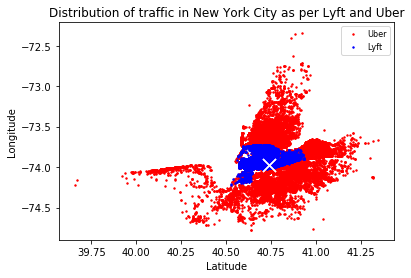

In [33]:
import matplotlib.pyplot as plt

trainDataAug["taxi_code"] = trainDataAug['Taxi Service'].map({'Uber':1,'Lyft':2})
trainDataAug['Date/Time'] = pd.to_datetime(trainDataAug['Date/Time'], infer_datetime_format =True)
#print(trainDataAug['Date/Time'][1])
trainDataAug['hour'] = trainDataAug['Date/Time'].dt.hour
                       
trainDataSep["taxi_code"] = trainDataSep['Taxi Service'].map({'Uber':1,'Lyft':2})
trainDataSep['Date/Time'] = pd.to_datetime(trainDataSep['Date/Time'], infer_datetime_format =True)
#print(trainDataAug['Date/Time'][1])
trainDataSep['hour'] = trainDataSep['Date/Time'].dt.hour
            
#print(trainDataAug['hour'][1])

trainDataLyft["taxi_code"] = trainDataLyft['Taxi Service'].map({'Uber':1,'Lyft':2})
trainDataLyft['Date/Time'] = pd.to_datetime(trainDataLyft['Date/Time'], infer_datetime_format =True)
#print(trainDataLyft['Date/Time'][1])
trainDataLyft['hour'] = trainDataLyft['Date/Time'].dt.hour
             

uberplot = trainDataAug[["Lat","Lon","taxi_code"]]
lyftplot = trainDataLyft[["Lat","Lon","taxi_code"]]


plt.title('Distribution of traffic in New York City as per Lyft and Uber')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
uberplt = plt.scatter(plttrainData["Lat"][plttrainData['taxi_code'] == 1],plttrainData["Lon"][plttrainData['taxi_code'] == 1],color='r',label="Uber", s=2)
lyftplt = plt.scatter(plttrainData["Lat"][plttrainData['taxi_code'] == 2],plttrainData["Lon"][plttrainData['taxi_code'] == 2],color='b',label="Lyft", s=2)
plt.scatter(centroids[:, 0], centroids[:, 1],marker='x', s=169, linewidths=3,color='white', zorder=10)
plt.legend((uberplt, lyftplt), ('Uber','Lyft'), scatterpoints=1,loc='top left', ncol=1,fontsize=8)
text = iter(['Uber', 'Lyft'])
plt.show()